In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pycheops.models import ReflectionModel
from lmfit import report_fit

In [2]:
T_0 = 0.5
P = 2.0
k = 0.15
R_s = 0.14
r_p = k*R_s
sini = 0.98
A_g = 0.6
f_c = 0.3
f_s = -0.2

In [3]:
m = ReflectionModel()
pars = m.make_params(T_0=T_0, A_g=A_g, r_p=r_p, sini=sini)
pars['P'].set(value=P, vary=False)
pars['f_c'].set(value=f_c, vary=False)
pars['f_s'].set(value=f_s, vary=False)
pars

name,value,initial value,min,max,vary
T_0,0.50000000,0.5,-inf,inf,True
P,2.00000000,2.0,1.0000e-15,inf,False
A_g,0.60000000,0.6,0.00000000,1.00000000,True
r_p,0.02100000,0.021,0.00000000,1.00000000,True
f_c,0.30000000,0.3,-1.00000000,1.00000000,False
f_s,-0.20000000,-0.2,-1.00000000,1.00000000,False
sini,0.98000000,0.98,0.00000000,1.00000000,False


(0.5, 2.499000000000002)

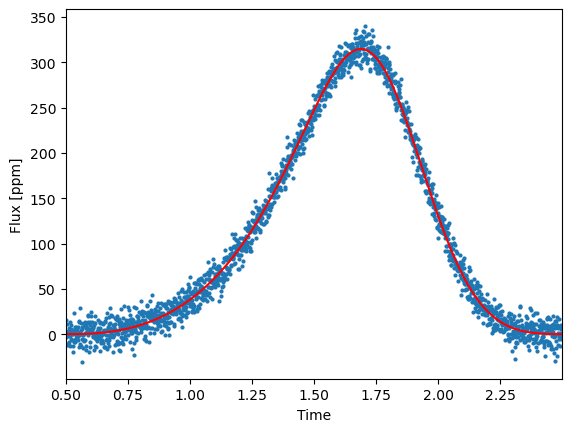

In [4]:
t = np.arange(T_0,T_0 + P, 0.001)
yerr = np.full_like(t,10e-6)
flux_true = m.eval(params=pars, t=t)
flux = flux_true + np.random.normal(0.0, yerr, size=len(t))
fig,ax=plt.subplots()
ax.scatter(t, flux*1e6,s=4)
ax.plot(t, flux_true*1e6,'r')
ax.set_xlabel('Time')
ax.set_ylabel('Flux [ppm]')
ax.set_xlim(min(t),max(t))


In [5]:
result = m.fit(flux, pars, t=t, weights=1/yerr)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 2000
    # variables        = 3
    chi-square         = 2029.85858
    reduced chi-square = 1.01645397
    Akaike info crit   = 35.6378906
    Bayesian info crit = 52.4405980
    R-squared          = -85491062.9
[[Variables]]
    T_0:   0.50017545 +/- 5.6088e-04 (0.11%) (init = 0.5)
    P:     2 (fixed)
    A_g:   0.60948733 +/- 16523414.8 (2711034992.81%) (init = 0.6)
    r_p:   0.02084396 +/- 282738.764 (1356454317.91%) (init = 0.021)
    f_c:   0.3 (fixed)
    f_s:  -0.2 (fixed)
    sini:  0.98 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_g, r_p) = -1.0000


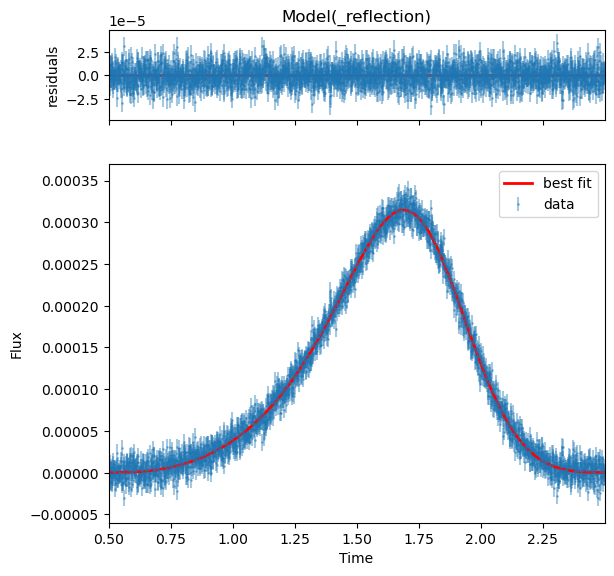

In [6]:
result.plot(xlabel='Time',ylabel='Flux' ,data_kws={'ms':1,'alpha':0.4},ax_fit_kws={'xlim':[min(t),max(t)]},
            fit_kws={'c':'r','lw':2});

&copy; Pierre Maxted, Keele University, 2024